In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
train_data = np.load(file="train_data/training_data-1.npy", encoding='bytes')

In [81]:
train_data[0][0].shape

(270, 480)

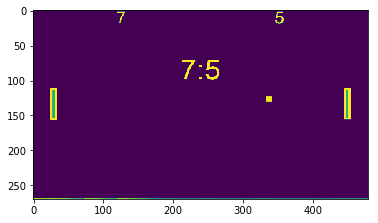

In [90]:
plt.imshow(train_data[300][0])

[[[ 269.            1.57079637]]]


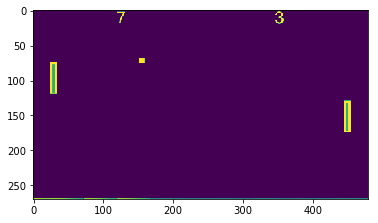

In [87]:
img = train_data[0][0].copy()
#gray = img
#edges = cv2.Canny(gray,50,150,apertureSize = 3)

#lines = cv2.HoughLines(edges,1,np.pi/180,200)
#for rho,theta in lines[0]:
   #a = np.cos(theta)
    #b = np.sin(theta)
    #x0 = a*rho
    #y0 = b*rho
    #x1 = int(x0 + 1000*(-b))
    #y1 = int(y0 + 1000*(a))
    #x2 = int(x0 - 1000*(-b))
    #y2 = int(y0 - 1000*(a))

    #cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)
print(lines)

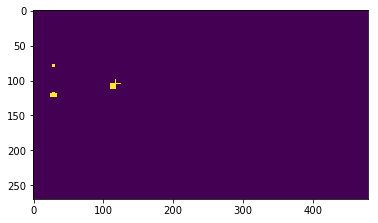

In [14]:
from collections import Counter

_, t_img = cv2.threshold(train_data[6][0] - train_data[5][0],10,255,cv2.THRESH_BINARY)

plt.imshow(t_img)

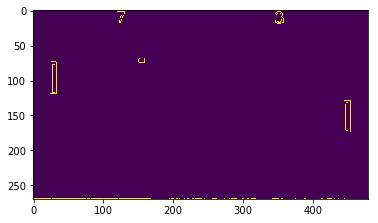

In [25]:
test_img = train_data[0][0].copy()
edged = cv2.Canny(test_img, 0, 0)
#plt.imshow(edged)
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
#screenCnt = None

plt.imshow(cnts[0])

#must use find countours or connected elements to find the ball

In [32]:
#%time datac = cv2.connectedComponentsWithStats(test_img, 8, cv2.CV_32S)

Wall time: 0 ns
[ 28.5  94.5] [ 449.5  151.5] [ 145.5   80.5]


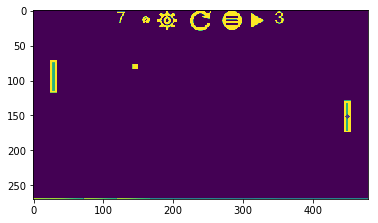

In [173]:
def get_objects_locations(img):
    #Simplify image using threshold (maybe not necessary)
    #_, cent_img = cv2.threshold(cent_img,10,255,cv2.THRESH_BINARY)
    
    #Get connected compontents in the image
    n_elem, labels, stats, centroids = cv2.connectedComponentsWithStats(img, 8, cv2.CV_32S)
    
    #Calculate features to determine which elements are ball and bars 
    calc_features = list()    
    for i, (x0,y0,width,height,area) in enumerate(stats):
        #Calc ball feature
        ball_feature = abs(width + height - 8 - 8 + area - 64)
        #Bar feature
        bar_feature = abs(width + height - 10 - 46 + area - 460)
        
        calc_features.append((i, ball_feature, bar_feature))
    
       
    #Sort values to get the most probable indexes of ball and bars
    ball_ind = sorted(calc_features, key=lambda a: a[1])[0][0]
    bars_ind = [bar_data[0] for bar_data in sorted(calc_features, key=lambda a: a[2])[0:2]]
    
    
    #Get the centroids with the indexes
    ball_center = centroids[ball_ind]
    bars_center = centroids[bars_ind]
    
    #Get left bar and right bar based on sorted value of the x position
    sorted_bars = sorted(bars_center, key=lambda a: a[0])
    
    left_bar_cent, right_bar_cent = sorted_bars[0], sorted_bars[1]
    
    return ball_center, left_bar_cent, right_bar_cent

    
img_test = train_data[1][0].copy()
%time ball_cent, l_bar, r_bar = get_objects_locations(img_test)

print(l_bar, r_bar, ball_cent)

cv2.circle(img_test, tuple(map(round, r_bar.tolist())), 3, 50, -1)
plt.imshow(img_test)

In [58]:
datac[2]

array([[     0,      0,    480,    269, 127952],
       [   120,      2,     12,     17,     79],
       [   347,      2,     12,     18,    105],
       [   152,     68,      8,      8,     64],
       [    24,     74,     10,     46,    460],
       [   445,    129,     10,     46,    460],
       [     0,    269,    480,      1,    480]], dtype=int32)

In [91]:
_, t_img = cv2.threshold(test_img,10,255,cv2.THRESH_BINARY)

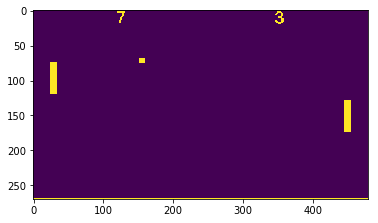

In [92]:
plt.imshow(t_img)

In [122]:
oi = cv2.Canny(t_img.copy(), 0, 0)
#plt.imshow()
oi[250]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

Wall time: 0 ns
Wall time: 79 ms


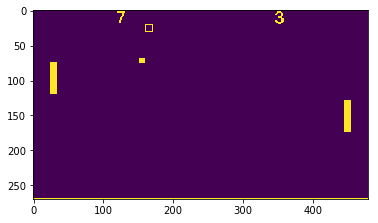

In [109]:
coord = (151,10)
%time img_rect = cv2.rectangle(t_img.copy(), (10 + coord[0], 10 + coord[1]), (20 + coord[0], 20 + coord[1]), 255, 1)

%time plt.imshow(img_rect)

In [57]:
%time ret, comps = cv2.connectedComponents(t_img)

Wall time: 0 ns


In [63]:
#plt.imshow(t_img[0:100,0:200])

In [65]:
%time im2, contours, hierarchy = cv2.findContours(t_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

Wall time: 1 ms


In [76]:
count_img = cv2.drawContours(t_img, contours, -1, (0,255,0), 3)

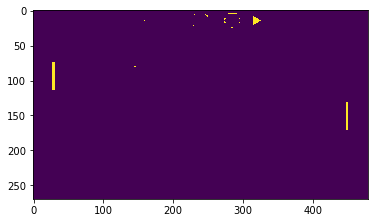

In [78]:
plt.imshow(t_img)

In [74]:
contours[4].shape

(15, 1, 2)